The program is to capture the specific frame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from re import X
import cv2 as cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow

vlist=["00","1000","2000","3000","4000","5000","6000","7000","8000","9000","10000","11000","12000","13000","14000","15000","16000","17000","18000","19000","20000","both_none"]
image_path="/content/drive/MyDrive/FYP/BEFiltering_image/"
for x in vlist:
  path="/content/drive/MyDrive/FYP/BEFiltering/BEfiltered_"+x+".avi"
  vid= cv2.VideoCapture(path)
  currentframe=0;
  count=0
  while(1):
    success, frame = vid.read()
    #current position of video file in milliseconds
    vid.set(cv2.CAP_PROP_POS_MSEC,(count*1000))
    if(currentframe==5):
      cv2.imwrite(image_path+"frame"+x+"_"+str(currentframe) + "sec.jpg", frame)
      #print("captureframe:")
      #print(frame.size)
      #cv2_imshow(frame)
      #print("frame"+x)
      break;
    currentframe=currentframe+1
    count=count+1
  #print(frame)

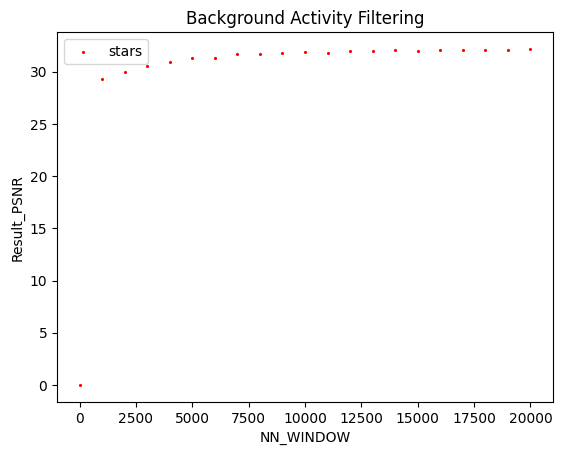

In [ ]:
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


imagelist=["00","1000","2000","3000","4000","5000","6000","7000","8000","9000","10000","11000","12000","13000","14000","15000","16000","17000","18000","19000","20000"]
image_path="/content/drive/MyDrive/FYP/BEFiltering_image/"
currentframe=0
PSNR=0
result_mse=[]
result_psnr=[]
# load the input images
img1 = cv2.imread(image_path+'frameboth_none_5sec.jpg')
#img1 = cv2.imread(image_path+'frame_5sec.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

for x in imagelist:
  if(x=="0"):
    continue
  img2 = cv2.imread(image_path+'frame'+x+'_5sec.jpg')
  # convert the images to grayscale
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  # define the function to compute MSE between two images
  def mse(img1, img2):
    h, w = img1.shape
    diff = cv2.subtract(img1, img2)
    err = np.sum(diff**2)
    mse = err/(float(h*w))
    return mse, diff

  def psnr(img1,img2,mse):
      Psnr=0
      max_pixel = 255.0
      if(mse==0):
        return Psnr
      Psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
      return Psnr

  error, diff = mse(img1, img2)
  PSNR=psnr(img1, img2, error)
  result_mse.append(error)
  result_psnr.append(PSNR)
  #print("Image matching Error between the two images (frame)"+x+":",round(error,4))
  #print("Peak Signal-to-Noise Ratio between the two images:",round(PSNR,4),"db")
  #cv2_imshow(img1)
  #cv2_imshow(img2)
  #cv2_imshow(diff)

imagelist = [int(i) for i in imagelist]
x=imagelist
y=result_psnr
# plotting points as a scatter plot
plt.scatter(x, y, label= "stars", color= "red", marker= "*", s=2)

# x-axis label
plt.xlabel('NN_WINDOW')
# frequency label
plt.ylabel('Result_PSNR')
# plot title
plt.title('Background Activity Filtering')

plt.legend()
plt.show()



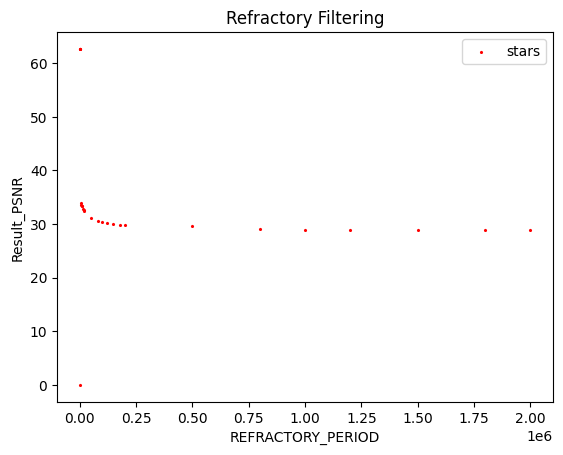

In [ ]:
import cv2
import math
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


imagelist=["30","1000","1800","2000","5000","8000","10000","12000","15000","18000","20000","50000","80000","100000","120000","150000","180000","200000","500000","800000","1000000","1200000","1500000","1800000","2000000"]
image_path="/content/drive/MyDrive/FYP/RefractoryFiltering_image/"
currentframe=0
PSNR=0
result_mse=[]
result_psnr=[]
# load the input images
img1 = cv2.imread(image_path+'frame_NONE_3sec.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

for x in imagelist:
  if(x=="0"):
    continue
  img2 = cv2.imread(image_path+'frame'+x+'_3sec.jpg')
  # convert the images to grayscale
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  # define the function to compute MSE between two images
  def mse(img1, img2):
    h, w = img1.shape
    diff = cv2.subtract(img1, img2)
    err = np.sum(diff**2)
    mse = err/(float(h*w))
    return mse, diff

  def psnr(img1,img2,mse):
      Psnr=0
      max_pixel = 255.0
      if(mse==0):
        return Psnr
      Psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
      return Psnr

  error, diff = mse(img1, img2)
  PSNR=psnr(img1, img2, error)
  result_mse.append(error)
  result_psnr.append(PSNR)
  #print("Image matching Error between the two images (frame)"+x+":",round(error,4))
  #print("Peak Signal-to-Noise Ratio between the two images:",round(PSNR,4),"db")
  #cv2_imshow(img1)
  #cv2_imshow(img2)
  #cv2_imshow(diff)

imagelist = [int(i) for i in imagelist]
x=imagelist
y=result_psnr
# plotting points as a scatter plot
plt.scatter(x, y, label= "stars", color= "red", marker= "*", s=2)

# x-axis label
plt.xlabel('REFRACTORY_PERIOD')
# frequency label
plt.ylabel('Result_PSNR')
# plot title
plt.title('Refractory Filtering')

plt.legend()
plt.show()


